In [1]:
from google.colab import files
income=files.upload()

Saving income.csv to income.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
df1=pd.read_csv("income.csv")
df1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [14]:
X = df1.drop('income_level', axis=1)
y = df1['income_level']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

abc = AdaBoostClassifier(n_estimators=10, random_state=42)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial AdaBoost accuracy (10 trees): {accuracy}")

param_grid = {'n_estimators': [50, 100, 150, 200]}
grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")
best_abc = grid_search.best_estimator_
y_pred_best = best_abc.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best model on the test set: {best_accuracy}")

Initial AdaBoost accuracy (10 trees): 0.8276803384972361
Best parameters: {'n_estimators': 200}
Best cross-validation score: 0.8330165086371949
Accuracy of the best model on the test set: 0.8311608544325394


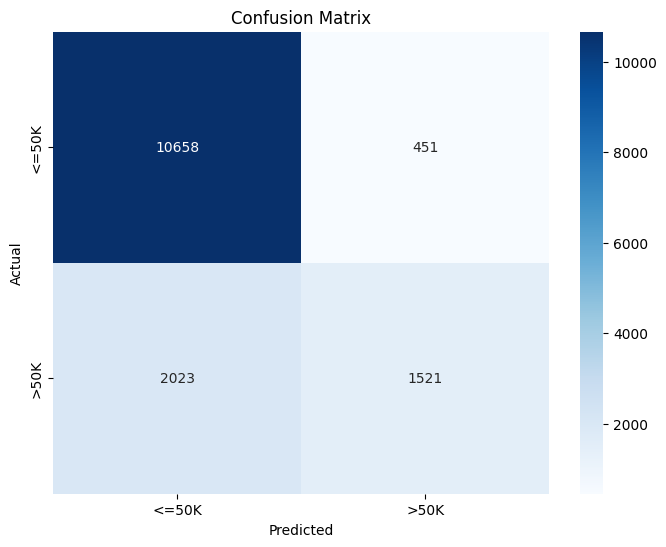

In [9]:
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
